In [1]:
from deap import tools, base, creator

import random, array

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.insert(0, "C:/Jupyter/Evolution")
import elitysm

import queens

gen	nevals	min	avg    
0  	300   	0  	4.83333
1  	255   	0  	4.06667
2  	248   	0  	3.79333
3  	261   	0  	3.78333
4  	255   	0  	3.68667
5  	244   	0  	3.45667
6  	252   	0  	3.65333
7  	239   	0  	3.50333
8  	236   	0  	3.34333
9  	244   	0  	3.46667
10 	243   	0  	3.38   
11 	251   	0  	3.24333
12 	237   	0  	3.24   
13 	260   	0  	3.36667
14 	251   	0  	3.34667
15 	243   	0  	3.23333
16 	254   	0  	3.24   
17 	233   	0  	3.19   
18 	247   	0  	3.02   
19 	235   	0  	2.99333
20 	239   	0  	2.99667
-Лучшее решение -
0 :  0.0  ->  Individual('i', [5, 2, 4, 6, 0, 3, 1, 7])
1 :  0.0  ->  Individual('i', [4, 1, 7, 0, 3, 6, 2, 5])
2 :  0.0  ->  Individual('i', [2, 0, 6, 4, 7, 1, 3, 5])
3 :  0.0  ->  Individual('i', [4, 2, 0, 6, 1, 7, 5, 3])
4 :  0.0  ->  Individual('i', [5, 2, 6, 1, 3, 7, 0, 4])
5 :  0.0  ->  Individual('i', [2, 5, 1, 4, 7, 0, 6, 3])
6 :  0.0  ->  Individual('i', [5, 3, 6, 0, 2, 4, 1, 7])
7 :  0.0  ->  Individual('i', [6, 4, 2, 0, 5, 7, 1, 3])
8 :  0.0  ->  Individual('i'

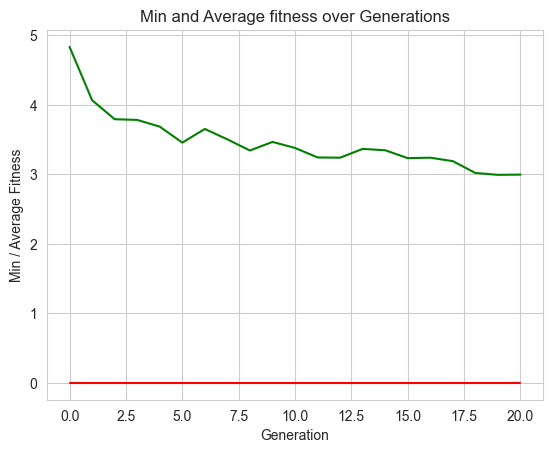

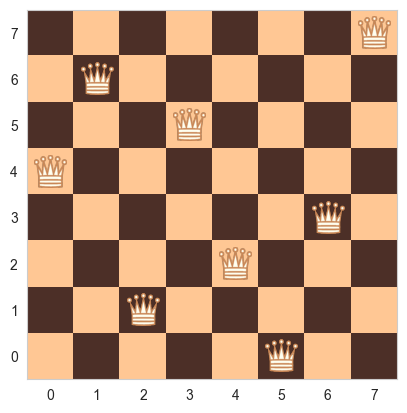

In [5]:
NUM_OF_QUEENS = 8

POPULATION_SIZE = 300
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 30
P_CROSSOVER = 0.9
P_MUTATIONS = 0.1

RANDOM_SEED = random.randint(0,1991)
random.seed(RANDOM_SEED)

nQueens = queens.NQueensProblem(NUM_OF_QUEENS)

toolbox = base.Toolbox()

creator.create("FitnessMin", base.Fitness, weights = (-1.0,))

creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox.register("randomOrder", random.sample, range(len(nQueens)), len(nQueens))
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def getViolationsCount(individual):
    return nQueens.getViolationsCount(individual),

toolbox.register("evaluate", getViolationsCount)

toolbox.register("select", tools.selTournament, tournsize = 2)
toolbox.register("mate", tools.cxUniformPartialyMatched, indpb = 2.0/len(nQueens))
toolbox.register("mutate", tools.mutShuffleIndexes, indpb = 1.0/len(nQueens))

def main():
    population = toolbox.populationCreator(n = POPULATION_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)
    
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    
    population, logbook = elitysm.eaSimpleWithElitism(population, toolbox,
                                                     cxpb = P_CROSSOVER,
                                                     mutpb= P_MUTATIONS,
                                                     ngen = MAX_GENERATIONS,
                                                     stats = stats,
                                                     halloffame= hof,
                                                     verbose = True)
    
    print("-Лучшее решение -")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i].fitness.values[0]," -> ", hof.items[i])
        
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(1)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')

    # plot best solution:
    sns.set_style("whitegrid", {'axes.grid' : False})
    nQueens.plotBoard(hof.items[0])

    # show both plots:
    plt.show()
    
if __name__ == "__main__":
    main()